# Hands On - Fighting Foodwaste - Introduction to Forecasting

# Import Data

In [1]:
import pandas as pd
bakery = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/bakery_sales.csv")

## Check Structure of Data

In [2]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [3]:
bakery.head()

,Date,Time,Transaction,Item
0,2018-10-30,09:58:11,1,Bread
1,2018-10-30,10:05:34,2,Scandinavian
2,2018-10-30,10:05:34,2,Scandinavian
3,2018-10-30,10:07:57,3,Hot chocolate
4,2018-10-30,10:07:57,3,Jam


## Importing Data correctly

Pandas has very good functionalities for dealing with time series - they save a tremendous lot of pre-processing work.

In [4]:
bakery = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/bakery_sales.csv", index_col="Date", parse_dates=True)

In [5]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21293 entries, 2018-10-30 to 2019-04-09
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         21293 non-null  object
 1   Transaction  21293 non-null  int64 
 2   Item         21293 non-null  object
dtypes: int64(1), object(2)
memory usage: 665.4+ KB


In [6]:
bakery.head()

,Time,Transaction,Item
Date,,,
2018-10-30,09:58:11,1,Bread
2018-10-30,10:05:34,2,Scandinavian
2018-10-30,10:05:34,2,Scandinavian
2018-10-30,10:07:57,3,Hot chocolate
2018-10-30,10:07:57,3,Jam


# Exploring Time Series

## Select A Product - Bread

In [7]:
bakery["quantity"] = 1
bakery.head()

,Time,Transaction,Item,quantity
Date,,,,
2018-10-30,09:58:11,1,Bread,1
2018-10-30,10:05:34,2,Scandinavian,1
2018-10-30,10:05:34,2,Scandinavian,1
2018-10-30,10:07:57,3,Hot chocolate,1
2018-10-30,10:07:57,3,Jam,1


In [8]:
product = bakery[bakery["Item"]=="Bread"]
product.head()

,Time,Transaction,Item,quantity
Date,,,,
2018-10-30,09:58:11,1,Bread,1
2018-10-30,10:13:03,5,Bread,1
2018-10-30,10:20:51,8,Bread,1
2018-10-30,10:21:59,9,Bread,1
2018-10-30,10:27:21,11,Bread,1


## Resampling Time Series

Pandas has extremely neat support for time series. The .resample() method easily allows to aggregate (upsample) and expand time series (downsample)

- **D** daily level
- **W** weekly level
- **Q** daily level
- **Y** daily level


In [9]:
product.resample("D").quantity.sum()  # daily

Date
2018-10-30    29
2018-10-31    24
2018-11-01    21
2018-11-02    17
2018-11-03    26
              ..
2019-04-05    20
2019-04-06    16
2019-04-07    15
2019-04-08    29
2019-04-09     9
Freq: D, Name: quantity, Length: 162, dtype: int64

In [10]:
product.resample("W").quantity.sum()  # weeky

Date
2018-11-04    147
2018-11-11    173
2018-11-18    196
2018-11-25    149
2018-12-02    137
2018-12-09    149
2018-12-16    149
2018-12-23    151
2018-12-30    113
2019-01-06     87
2019-01-13    124
2019-01-20    132
2019-01-27    139
2019-02-03    183
2019-02-10    153
2019-02-17    137
2019-02-24    156
2019-03-03    142
2019-03-10    143
2019-03-17    118
2019-03-24    136
2019-03-31    136
2019-04-07    137
2019-04-14     38
Freq: W-SUN, Name: quantity, dtype: int64

In [11]:
product.resample("Q").quantity.sum()  # quarterly

Date
2018-12-31    1390
2019-03-31    1760
2019-06-30     175
Freq: Q-DEC, Name: quantity, dtype: int64

## Plot Time Series

In [12]:
product_ts = product.resample("D").quantity.sum()

<AxesSubplot:xlabel='Date'>

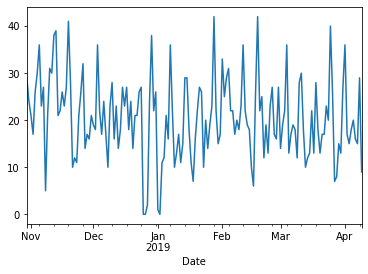

In [13]:
product_ts.plot()

## Create some Time Series Features

In [14]:
product_df = pd.DataFrame(product_ts)
product_df.head()

,quantity
Date,
2018-10-30,29
2018-10-31,24
2018-11-01,21
2018-11-02,17
2018-11-03,26


### Add "day of the week" feature

In [15]:
product_df["day_of_week"] = product_df.index.weekday
product_df

,quantity,day_of_week
Date,,
2018-10-30,29,1
2018-10-31,24,2
2018-11-01,21,3
2018-11-02,17,4
2018-11-03,26,5
...,...,...
2019-04-05,20,4
2019-04-06,16,5
2019-04-07,15,6


In pandas the week starts with 0 (Mondays) and ends with 6 (Sunday). Our data is going from Tuesday to Tuesday. 

We have data for 23 weeks and 1 day (in total 162 days). We drop the first day such that we have data on 23 full weeks (eases the handling of time series a bit).

Dropping first instance:

In [16]:
product_df = product_df.iloc[1: , :]
product_df

,quantity,day_of_week
Date,,
2018-10-31,24,2
2018-11-01,21,3
2018-11-02,17,4
2018-11-03,26,5
2018-11-04,30,6
...,...,...
2019-04-05,20,4
2019-04-06,16,5
2019-04-07,15,6


### Add "week of year" Feature

In [17]:
product_df.index.isocalendar().week

Date
2018-10-31    44
2018-11-01    44
2018-11-02    44
2018-11-03    44
2018-11-04    44
              ..
2019-04-05    14
2019-04-06    14
2019-04-07    14
2019-04-08    15
2019-04-09    15
Freq: D, Name: week, Length: 161, dtype: UInt32

Due to the Wednesday to Tuesday structure of the data, we have inequally spaced weeks. 

But we can shift the weeks by two days such that we have "effective weeks"

In [18]:
product_df["week_of_year"] = product_df.index.shift(periods = - 2, freq = "D").isocalendar().week.values
product_df

C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\2199957993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df["week_of_year"] = product_df.index.shift(periods = - 2, freq = "D").isocalendar().week.values


,quantity,day_of_week,week_of_year
Date,,,
2018-10-31,24,2,44
2018-11-01,21,3,44
2018-11-02,17,4,44
2018-11-03,26,5,44
2018-11-04,30,6,44
...,...,...,...
2019-04-05,20,4,14
2019-04-06,16,5,14
2019-04-07,15,6,14


### Add "is_closed" feature

In [19]:
product_df["is_closed"] = (product_df["quantity"]==0).astype(int)
product_df

C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\2484594928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df["is_closed"] = (product_df["quantity"]==0).astype(int)


,quantity,day_of_week,week_of_year,is_closed
Date,,,,
2018-10-31,24,2,44,0
2018-11-01,21,3,44,0
2018-11-02,17,4,44,0
2018-11-03,26,5,44,0
2018-11-04,30,6,44,0
...,...,...,...,...
2019-04-05,20,4,14,0
2019-04-06,16,5,14,0
2019-04-07,15,6,14,0


## Seasonal Decomposition

a standarf plotting function:

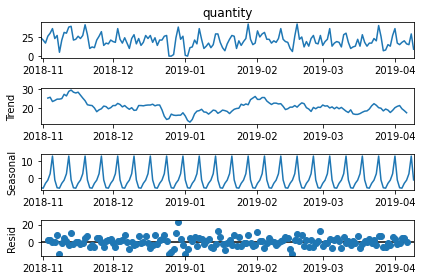

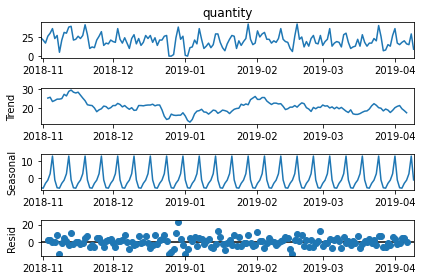

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(product_df["quantity"])
decomp.plot()

# Create Test & Train Data

In [21]:
test = product_df[-28:] # get last 28 days
train = product_df[0:-28] # get data until first day of testing day

# Naive Forecasting

Import required modules

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

Make copy of training data "history" for walk forward validation

In [23]:
history = train
history

,quantity,day_of_week,week_of_year,is_closed
Date,,,,
2018-10-31,24,2,44,0
2018-11-01,21,3,44,0
2018-11-02,17,4,44,0
2018-11-03,26,5,44,0
2018-11-04,30,6,44,0
...,...,...,...,...
2019-03-08,18,4,10,0
2019-03-09,12,5,10,0
2019-03-10,28,6,10,0


Initialize empty list for performance metrics in each week of the 4 weeks

In [24]:
performance_collector = []

In [25]:
for w in test["week_of_year"].unique():
  y_pred = pd.Series([history.tail(1)["quantity"]]*7) # get value of last day of last week in history
  actual = test[test["week_of_year"]==w]["quantity"] # get actual values to be predicted in week w
  
  history = history.append(test[test["week_of_year"]==w]) # append training data to history; we shift one week forward in next iteration
  performance_collector.append(mean_squared_error(actual,y_pred, squared=False)) #calculalate error in week w

C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3981050591.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w]) # append training data to history; we shift one week forward in next iteration
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3981050591.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w]) # append training data to history; we shift one week forward in next iteration
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3981050591.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w]) # append training data to history; we shift one week 

In [26]:
performance_collector

[6.164414002968976, 9.289010404005062, 12.856349181852298, 5.694608979427072]

In [27]:
print(performance_collector)
print(np.mean(performance_collector))

[6.164414002968976, 9.289010404005062, 12.856349181852298, 5.694608979427072]
8.501095642063351


In [28]:
plot_week_NAIVE = pd.DataFrame({"NAIVE":performance_collector})
plot_week_NAIVE

,NAIVE
0,6.164414
1,9.289010
2,12.856349
3,5.694609


In [29]:
def performance_week_plot(list_of_predictions):
  import matplotlib.pyplot as plt
  pd.concat(list_of_predictions, axis=1).plot(color=["#7FC97F","#BEAED4","#FDC086","#FFFF99"], alpha=0.5, linewidth=5)
  plt.ylabel("RMSE")
  plt.xlabel("Week")
  plt.xticks(ticks=[0,1,2,3],labels=["1","2","3","4"])
  plt.title("Performance by Week")
  plt.show()

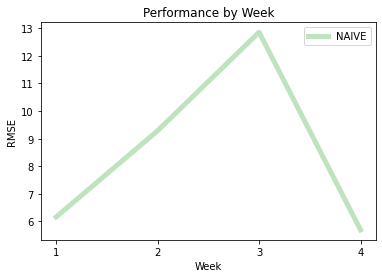

In [30]:
performance_week_plot([plot_week_NAIVE])

In [31]:
def performance_avg_plot(list_of_predictions):
  import matplotlib.pyplot as plt
  pd.concat(list_of_predictions, axis=1).mean().plot(kind="bar",color=["#7FC97F","#BEAED4","#FDC086","#FFFF99"], alpha=0.6)
  plt.ylabel("RMSE")
  plt.xlabel("Approach")
  plt.xticks(rotation=0)
  plt.title("4 Weeks Average")
  plt.show()

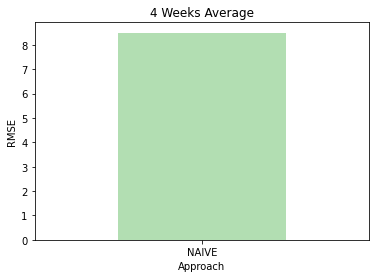

In [32]:
performance_avg_plot([plot_week_NAIVE])

# SNAIVE Foreacasting

## Initialize 4 Week-Forward Validation

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
history = train
performance_collector = []

## 4 Week-Forward Validation

In [34]:
for w in test["week_of_year"].unique():
  y_pred = pd.Series(history.tail(7)["quantity"])
  actual = test[test["week_of_year"]==w]["quantity"]
  
  history = history.append(test[test["week_of_year"]==w])
  
  performance_collector.append(mean_squared_error(actual,y_pred, squared=False))

C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\723819234.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w])
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\723819234.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w])
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\723819234.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w])
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\723819234.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history 

In [35]:
print(performance_collector)
print(np.mean(performance_collector))

[8.035634920242991, 6.6332495807108, 7.240757655699535, 8.06225774829855]
7.492974976237969


In [36]:
plot_week_SNAIVE = pd.DataFrame({"SNAIVE":performance_collector})

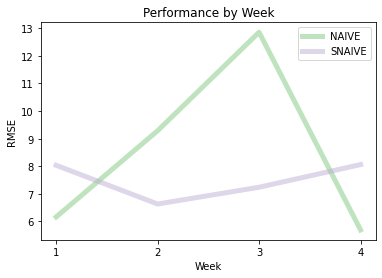

In [37]:
performance_week_plot([plot_week_NAIVE, plot_week_SNAIVE])

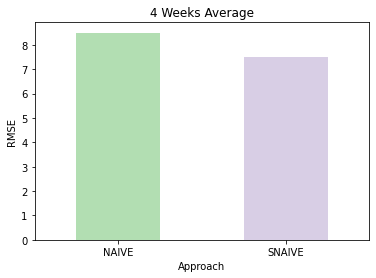

In [38]:
performance_avg_plot([plot_week_NAIVE, plot_week_SNAIVE])

# ARIMA Forecasting

## Plot ACF

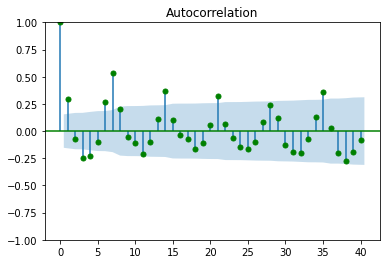

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(product_ts, lags=40,color='g')

*  Correlation of Time Series with lagged version of itself
*  We see strong seasonal patterns: lags at day 7, 14, 21 are correlated with our sales >> there is a "weekly sales memory"
*   To some extend also the day before


## Plot PACF

C:\Users\PGordetzki\Workspace\DefaultPython\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


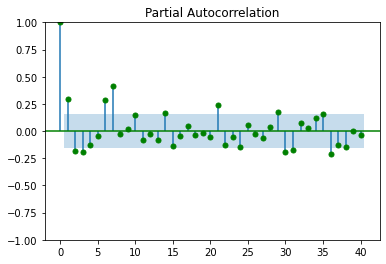

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(product_ts, lags=40,color='g')

*  Pacf are somilar to acf, but pacf reduce the effect of prior lags
*  Pacf can be used to decide how many lags to include
*  We can see that the "weekly sales memory" becomes weaker over time, after week 3 (day 21) past sales does not contain no usable information any more


## Initialize 4 Week-Forward Validation

pmdarima is a very handy package for ARIMA, but it is not installed within the anaconda framework and google collab

*   In Jupyter: the following command must be executed once
*   In google collab: the following command must be executed everytime pmdarima should be used



In [41]:
!pip install pmdarima 

You should consider upgrading via the 'C:\Users\PGordetzki\Workspace\DefaultPython\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
history = train
performance_collector = []

## Train Auto ARIMA Model

In [43]:
arima = auto_arima(train["quantity"], error_action='ignore', trace=True,
                   suppress_warnings=True, maxiter=30,
                   seasonal=True, m=7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=903.898, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=954.586, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=909.311, Time=0.42 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=918.404, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1208.871, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=913.998, Time=0.80 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=904.545, Time=0.68 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=905.791, Time=0.86 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=905.791, Time=0.91 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=934.983, Time=0.24 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=914.843, Time=0.98 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=904.149, Time=0.99 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=904.199, Time=1.53 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=909.033, Time=0.75 sec
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=inf,

## 4 Week-Forward Validation

In [44]:
for w in test["week_of_year"].unique():
  y_pred = pd.Series(arima.predict(7))
  actual = test[test["week_of_year"]==w]["quantity"]

  history = history.append(test[test["week_of_year"]==w])
  
  performance_collector.append(mean_squared_error(actual,y_pred, squared=False))

C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3619441536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w])
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3619441536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w])
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3619441536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(test[test["week_of_year"]==w])
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\3619441536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hist

In [45]:
print(performance_collector)
print(np.mean(performance_collector))

[6.790409619136199, 6.502007951358054, 7.324817831259952, 5.5582773980552815]
6.543878199952371


In [46]:
plot_week_ARIMA = pd.DataFrame({"ARIMA":performance_collector})

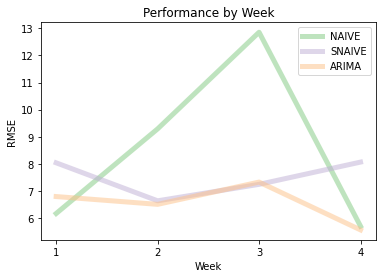

In [47]:
performance_week_plot([plot_week_NAIVE, plot_week_SNAIVE,plot_week_ARIMA])

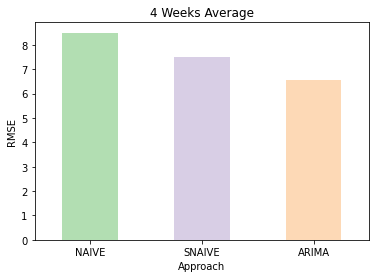

In [48]:
performance_avg_plot([plot_week_NAIVE, plot_week_SNAIVE,plot_week_ARIMA])

# Going Machine Learning

## Initial Feature Engineering

Manually Define time lags. We have seen in the acf and pacf plots that going up to 2 weeks back in past might yield important information. So, we take day 7 to 14.

In [49]:
shifts = np.arange(7, 15).astype(int)
shifts

array([ 7,  8,  9, 10, 11, 12, 13, 14])

The following codes creates the shifted variables that we defined in **shifts**.

In [50]:
train

,quantity,day_of_week,week_of_year,is_closed
Date,,,,
2018-10-31,24,2,44,0
2018-11-01,21,3,44,0
2018-11-02,17,4,44,0
2018-11-03,26,5,44,0
2018-11-04,30,6,44,0
...,...,...,...,...
2019-03-08,18,4,10,0
2019-03-09,12,5,10,0
2019-03-10,28,6,10,0


In [51]:
shifted_data = {"lag_{}_day".format(day_shift): train["quantity"].shift(day_shift) for day_shift in shifts}
shifted_data = pd.DataFrame(shifted_data)
shifted_data.head(20)

,lag_7_day,lag_8_day,lag_9_day,lag_10_day,lag_11_day,lag_12_day,lag_13_day,lag_14_day
Date,,,,,,,,
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-07,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-08,21.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN


We merge the shifted variables to our training data

In [52]:
train = pd.concat([train,shifted_data],axis=1)
train

,quantity,day_of_week,week_of_year,is_closed,lag_7_day,lag_8_day,lag_9_day,lag_10_day,lag_11_day,lag_12_day,lag_13_day,lag_14_day
Date,,,,,,,,,,,,
2018-10-31,24,2,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,21,3,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,17,4,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-03,26,5,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-04,30,6,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-08,18,4,10,0,14.0,27.0,16.0,17.0,27.0,23.0,13.0,19.0
2019-03-09,12,5,10,0,19.0,14.0,27.0,16.0,17.0,27.0,23.0,13.0
2019-03-10,28,6,10,0,22.0,19.0,14.0,27.0,16.0,17.0,27.0,23.0


Also we can use the seasonal component of the seasonal decomposition. We see that this patterns repeats all 7 days

<AxesSubplot:xlabel='Date'>

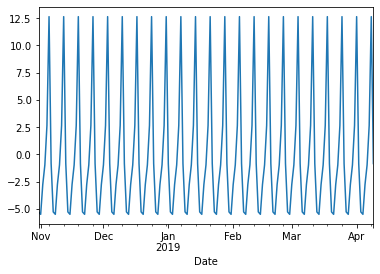

In [53]:
decomp.seasonal.plot()

In [54]:
train["seasonality"] = decomp.seasonal
train

,quantity,day_of_week,week_of_year,is_closed,lag_7_day,lag_8_day,lag_9_day,lag_10_day,lag_11_day,lag_12_day,lag_13_day,lag_14_day,seasonality
Date,,,,,,,,,,,,,
2018-10-31,24,2,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.267484
2018-11-01,21,3,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.488263
2018-11-02,17,4,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.760991
2018-11-03,26,5,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.960031
2018-11-04,30,6,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.667581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-08,18,4,10,0,14.0,27.0,16.0,17.0,27.0,23.0,13.0,19.0,-2.760991
2019-03-09,12,5,10,0,19.0,14.0,27.0,16.0,17.0,27.0,23.0,13.0,-0.960031
2019-03-10,28,6,10,0,22.0,19.0,14.0,27.0,16.0,17.0,27.0,23.0,2.667581


Delete NA from training data

In [55]:
train = train.dropna()

Separate Feature and Label

In [56]:
X_train = train.drop("quantity", axis=1)
y_train = train["quantity"] 

## Train Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
forecast_forest = RandomForestRegressor(n_estimators=10000)
forecast_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10000)

## Initialze 4 Week-Forward Validation

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error
history = train
performance_collector = []

## 4 Week-Forward Validation

In [59]:
for w in test["week_of_year"].unique():

  dat = history.tail(14) # get last 14 days of available data
  
  dat = pd.concat([dat,test[test["week_of_year"]==w]]) #add test data

  shifted_data = {"lag_{}_day".format(day_shift): dat["quantity"].shift(day_shift) for day_shift in shifts} # lag training data
  shifted_data = pd.DataFrame(shifted_data)

  dat= pd.concat([dat[["quantity","day_of_week","week_of_year","is_closed"]],shifted_data],axis=1) # add shifted data

  dat = dat.dropna() # delete missing data 

  dat["seasonality"] = decomp.seasonal.head(7).values #add seasonal data
  pred_dat = dat.drop("quantity", axis=1)

  y_pred = forecast_forest.predict(pred_dat)
  actual = test[test["week_of_year"]==w]["quantity"]
  
  performance_collector.append(mean_squared_error(actual,y_pred, squared=False))

  history = history.append(dat)

C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\249112291.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(dat)
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\249112291.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(dat)
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\249112291.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(dat)
C:\Users\PGordetzki\AppData\Local\Temp\ipykernel_23080\249112291.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(dat)


In [60]:
print(performance_collector)
print(np.mean(performance_collector))

[6.030283680486588, 4.677805316140709, 6.63449820429979, 5.4111688163068274]
5.688439004308478


In [61]:
plot_week_RF = pd.DataFrame({"RF":performance_collector})

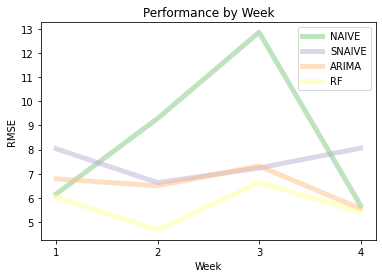

In [62]:
performance_week_plot([plot_week_NAIVE, plot_week_SNAIVE,plot_week_ARIMA,plot_week_RF])

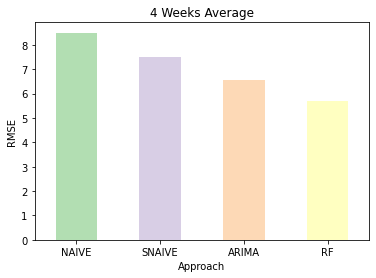

In [63]:
performance_avg_plot([plot_week_NAIVE, plot_week_SNAIVE,plot_week_ARIMA,plot_week_RF])